<a href="https://colab.research.google.com/github/SanjayS2348553/Trimester-3/blob/main/2348553_MalwareDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/MalwareArtifacts.csv')
df.head()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


# Prepocessing

In [ ]:
# Separate features (X) and labels (y)
X = df.drop('legitimate', axis=1)  # Features
y = df['legitimate']  # Labels

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform preprocessing
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Engineering

In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


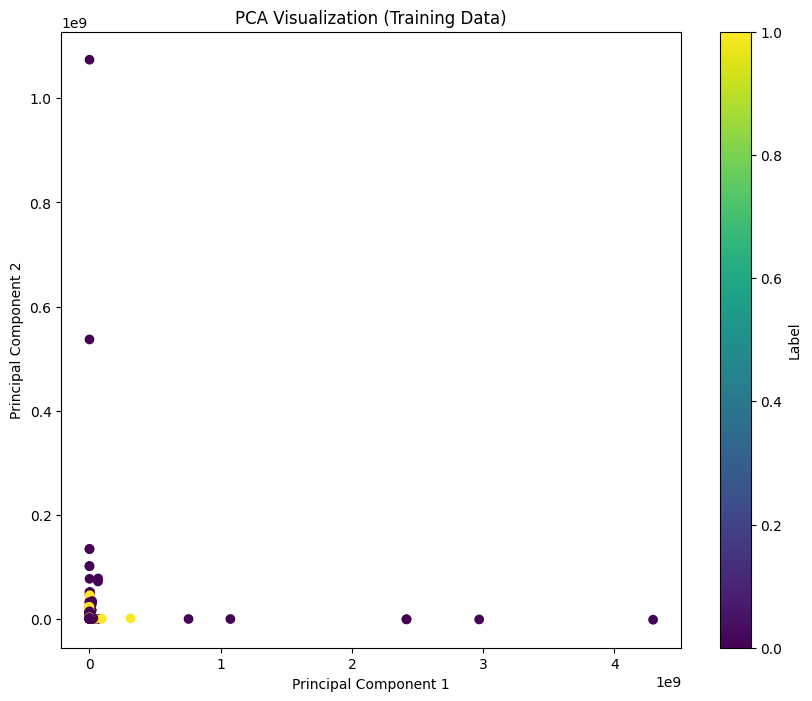

In [ ]:
# Visualize the PCA results for training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Visualization (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

# Random Forest Classifier

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Classification report
print(classification_report(y_test, y_pred_rf))

accuracy_rate = accuracy_rf * 100
print(f'Random Forest Accuracy Rate: {accuracy_rate:.2f}%')

Random Forest Accuracy: 0.9916
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19186
           1       0.98      0.99      0.99      8303

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489

Random Forest Accuracy Rate: 99.16%


# Malware detection

In [ ]:
# Load the trained model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Assuming the model has already been trained and saved as rf_classifier

# Load the new data
new_data = pd.read_csv('/new_MalwareArtifacts.csv')

# Preprocess the new data
# Separate features (X_new) from the new data
X_new = new_data.drop('legitimate', axis=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform preprocessing similar to the training data
X_new_pca = pca.transform(X_new_scaled)  # Assuming 'pca' is the PCA model fitted to the training data

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are already defined

# Use the trained model for inference
predictions = rf_classifier.predict(X_new_pca)

# Print the predictions
print("Predictions:", predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Predictions: [0 0 0 ... 0 0 0]
